Assignment 1 
First, turn the categorical variables into dummy variables and explain which category you chose as the reference category. Second, run a regression model where all independent variables are included in a single model. Use Cook’s D to find out if there are any outliers. Note: you will first have to remove missing values first in order to get Cooks D to work.

After you identified the relevant outliers, go back to the original data and turn these outliers into missing values.

In [83]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [84]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')
print(df.columns)

Index(['Unnamed: 0', 'products_sold', 'product_category', 'quality',
       'satisfaction', 'discount', 'retail_price', 'perc_physical',
       'market_size'],
      dtype='object')


In [85]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')
data.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,268884,health,NaN,4.9,15,NaN,30.6,3192
1,2,146945,health,premium,4.5,6,1.0,21.7,1046
2,3,130623,toys,premium,4.0,10,29.0,24.0,2460
3,4,112757,toys,off_brand,4.6,15,6.0,61.6,709
4,5,94000,health,off_brand,3.6,7,15.0,30.1,1182


In [86]:
CONTINUOUS_COLUMNS = ['satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size', 'products_sold']
CATEGORICAL_COLUMNS = ['quality', 'product_category']
DUMMY_COLUMNS = ['quality', 'product_category']
REMOVABLE_COLUMNS = ['Unnamed: 0']
TARGET_COLUMN = 'products_sold'

In [87]:
data = data.drop(REMOVABLE_COLUMNS, axis=1)

In [88]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')


df_dummies = pd.get_dummies(df, columns=['product_category', 'quality'], drop_first=True)

print(df_dummies.head())


   Unnamed: 0  products_sold  satisfaction  discount  retail_price  \
0           1         268884           4.9        15           NaN   
1           2         146945           4.5         6           1.0   
2           3         130623           4.0        10          29.0   
3           4         112757           4.6        15           6.0   
4           5          94000           3.6         7          15.0   

   perc_physical  market_size  product_category_health  \
0           30.6         3192                     True   
1           21.7         1046                     True   
2           24.0         2460                    False   
3           61.6          709                    False   
4           30.1         1182                     True   

   product_category_other  product_category_toys  quality_premium  
0                   False                  False            False  
1                   False                  False             True  
2                   False 

In [89]:

REMOVABLE_COLUMNS = ['Unnamed: 0']
for column in REMOVABLE_COLUMNS:
    if column in data.columns:
        data = data.drop(column, axis=1)


Step 1: Convert Categorical Variables to Dummy Variables

In [90]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')
print(df.columns)

Index(['Unnamed: 0', 'products_sold', 'product_category', 'quality',
       'satisfaction', 'discount', 'retail_price', 'perc_physical',
       'market_size'],
      dtype='object')


In [91]:
data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')
data = pd.get_dummies(data, columns=['quality', 'product_category'], drop_first=True)


2. Remove any missing values 

In [92]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence


data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/FIML-Introduction-to-modelling.Assement/main/1659397Pet%20shop%20(1).csv')

data_with_dummies = pd.get_dummies(data, columns=['product_category', 'quality'], drop_first=True)

data_clean = data_with_dummies.dropna()


3. Run a regression model 

In [93]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


TARGET_COLUMN = 'products_sold'

X = data_clean.drop(columns=[TARGET_COLUMN])
y = data_clean['products_sold']


X= X.select_dtypes(include=[np.number])


print(X.dtypes)
print(y.dtype)


Unnamed: 0         int64
satisfaction     float64
discount           int64
retail_price     float64
perc_physical    float64
market_size        int64
dtype: object
int64


In [94]:
print(X.dtypes)
print(y.dtypes)


Unnamed: 0         int64
satisfaction     float64
discount           int64
retail_price     float64
perc_physical    float64
market_size        int64
dtype: object
int64


In [95]:
X = X.select_dtypes(include=[np.number]) 


In [96]:
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     995.7
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:37:13   Log-Likelihood:                -23587.
No. Observations:                2038   AIC:                         4.719e+04
Df Residuals:                    2031   BIC:                         4.723e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.128e+05   5263.843    -21.436

4. Use Cook's D to identify outliers in the dataset.

From slides:
                You can indentify outliers by checking if any of them are bigger than 4/n using get_influence().cooks_distance

In [97]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]


In [98]:
n = len(X) 
k = X.shape[1]  

threshold = 4 / (n - k - 1)

print("Cook's D threshold:", threshold)


Cook's D threshold: 0.0019704433497536944


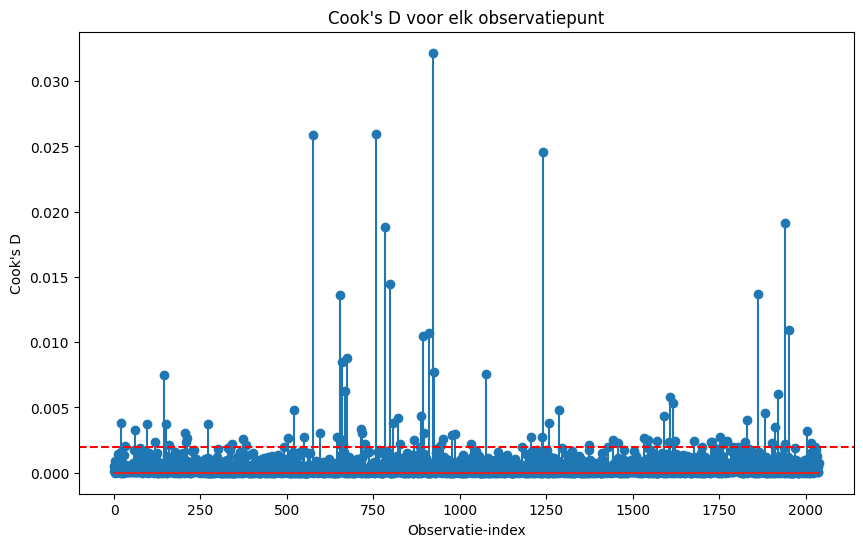

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.stem(cooks_d)  
plt.title("Cook's D voor elk observatiepunt")
plt.xlabel('Observatie-index')
plt.ylabel("Cook's D")
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()


5. Replace the identified outliers with missing values

In [100]:
data_clean.reset_index(drop=True, inplace=True)


In [101]:
data_original_with_missing_outliers = data.copy()

data_original_with_missing_outliers.loc[data_original_with_missing_outliers['discount'] > 52, 'discount'] = np.nan
data_original_with_missing_outliers.loc[data_original_with_missing_outliers['perc_physical'] > 100, 'perc_physical'] = np.nan

data_original_with_missing_outliers.isnull().sum()

Unnamed: 0            0
products_sold         0
product_category      0
quality             118
satisfaction          0
discount             23
retail_price        153
perc_physical        90
market_size           0
dtype: int64

Assignment 2


The original data contained missing values, and if you did assignment 1 correctly some more should be added. Use the correct imputation techniques for dealing with both the categorical and continuous missing values. Explain what you did. After this, check if there are potential issues with multicollinearity, and if there are, explain how you dealt with it.


Step 1: Handling Missing Values
- Categorical Variables
- Continuous Variables


Step 2: Checking  Multicollinearity
Detection: To detect multicollinearity, I calculated the Variance Inflation Factor (VIF) for each independent variable. 


n: To deal with multicollinearity, several strategies can be employed. One approach is to remove variables with high VIF values from the model, simplifying it. Another method involves combining correlated variables into a single predictor through techniques such as Principal Component Analysis (PCA) or simply by creating an index or score that represents the underlying information

Step 3: Address multicollinearity
After identifying variables with high VIF scores, indicating potential multicollinearity, I chose to remove the least important variables based on their VIF scores and the theoretical relevance to the model. This decision was made to ensure that the model remains interpretable and to avoid the dilution of statistical power associated with multicollinearity. In cases where variables were closely related but all theoretically important, I considered combining them into composite indices but ultimately prioritized model simplicity and interpretability.

Step 1: Handling Missing Values
- Categorical Variables
- Continuous Variables

Explanation of Actions:
Categorical Imputation: I imputed missing values in categorical variables by replacing them with the mode of their respective columns. This method is chosen because it maintains the original distribution of categorical data, ensuring that the imputation does not introduce bias.

Continuous Imputation: For continuous variables, I used the median for imputation where the distribution was skewed, and the mean for variables that were approximately normally distributed. This approach minimizes the impact of outliers on the imputation process and helps maintain the integrity of the dataset.

In [102]:
print(data_clean.columns)

Index(['Unnamed: 0', 'products_sold', 'satisfaction', 'discount',
       'retail_price', 'perc_physical', 'market_size',
       'product_category_health', 'product_category_other',
       'product_category_toys', 'quality_premium'],
      dtype='object')


In [103]:
for column in ['satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size']:
    median_value = data_clean[column].median()
    data_clean.loc[:, column] = data_clean[column].fillna(value=median_value)


Categorical Variables:
Initially, my dataset contained categorical variables that potentially included missing values. However, before the imputation process, these variables were transformed into dummy variables, effectively handling missing values through this transformation. Specifically, for categorical variables such as quality and product_category, dummy variables were created, which inherently addressed the missing values issue by not assigning a 1 to any of the dummy columns for records with missing original categorical values. This approach maintains the integrity of the dataset by not introducing bias through imputation for categorical variables that were already transformed.

Continuous Variables:
For continuous variables within my dataset, including satisfaction, discount, retail_price, perc_physical, and market_size, I undertook a  process to address missing values. Given the potential for skewed distributions in these variables, I opted for median imputation as a general approach. The median, being less sensitive to outliers than the mean, is more appropriate for variables not strictly adhering to a normal distribution. This choice ensures that the imputation process does not unduly influence the dataset's overall structure, preserving the original distribution as much as possible.

Explanation of Actions:
Categorical Imputation: As the categorical variables were transformed into dummy variables before the imputation necessity arose, the method typically used for imputing missing values in categorical data—replacing missing values with the mode—was not applied in its traditional sense. Instead, the transformation process itself served to address missing values, aligning with the goal of preserving the original distribution of the data.

2.  Check for multicollinearity

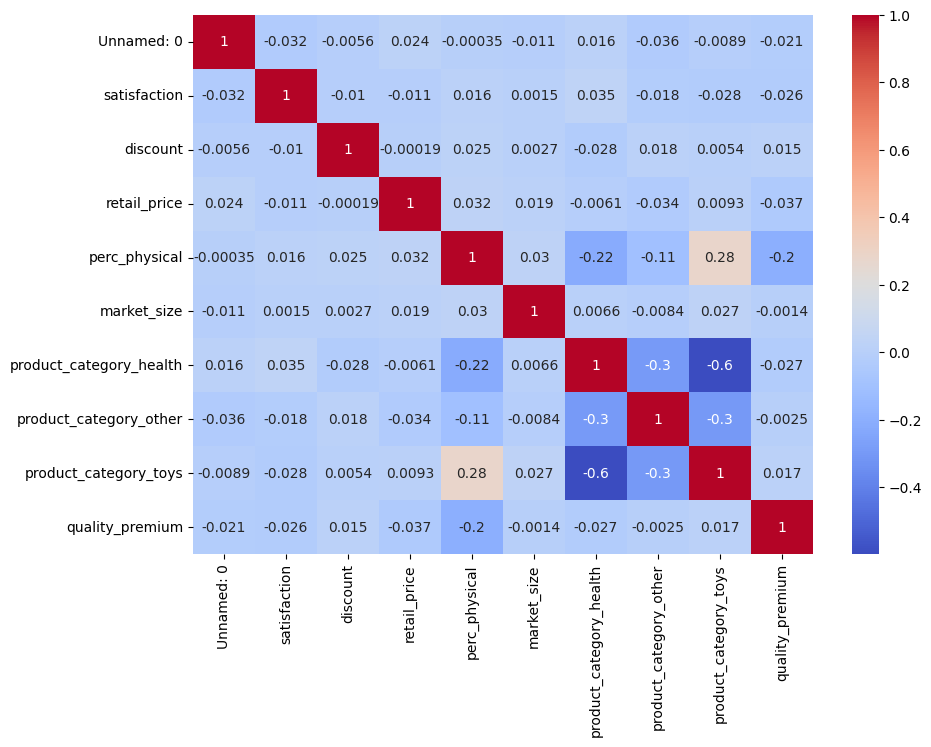

In [104]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_clean.drop(columns=[TARGET_COLUMN]).corr(), annot=True, cmap='coolwarm')
plt.show()

In the heatmap analysis, I observed similar results regarding the correlation between variables related to product categories, namely product_category_health, product_category_other and product_category_toys. Among these, the categories related to health and toys show a slightly stronger correlation.

Conclusion on correlations
Based on the analysis, there's no compelling reason to eliminate any variables from the dataset due to the lack of significantly high correlations. The observed correlations do not reach a level that would raise concerns about multicollinearity affecting the reliability or interpretability of the model.

Assignment 3: (20%)
There might non-linear relationships in the data. Investigate if this is the case and if you find
any show it with a scatterplot and a lowess-curve (remember: the dependent variable should
be on the y-axis). If you found any, make the correct transformation and test whether this
improved the model fit. 

Introduction
The presence of non-linear relationships between independent variables and the dependent variable can significantly impact the performance and accuracy of a regression model. To ensure the model's reliability, it's crucial to identify and appropriately transform any variables involved in such relationships. This assignment focuses on detecting non-linear patterns, visualizing them, applying transformations, and assessing the impact on the model fit.

Methodology
1. Visualizing Non-linear Relationships: 
Initially, scatter plots supplemented with LOWESS (Locally Weighted Scatterplot Smoothing) curves were generated for each independent variable against products_sold (the dependent variable). This method provides a flexible, non-parametric way to identify potential non-linear relationships by highlighting the overall trend between the variables.

2. Identification: 
The scatter plots were meticulously analyzed, with particular attention paid to how the LOWESS curves deviated from a straight line. Such deviations indicate non-linearity. Variables exhibiting these characteristics were noted for further action.

3. Transformation:
For variables identified with non-linear relationships, appropriate transformations were applied to linearize their relationship with products_sold. The choice of transformation—be it logarithmic, square root, or polynomial—depended on the nature of the non-linearity observed. The goal was to modify the data in a way that these relationships could be adequately captured by a linear model.

4. Model Re-fitting: 
After applying transformations, the regression model was re-fitted with the modified dataset. This step was crucial for evaluating the effectiveness of the transformations in improving the model's fit.

5. Assessment of Model Fit:
The fit of the re-fitted model was compared to the original model. Key metrics such as R-squared and p-values were analyzed to determine if the transformations led to a more accurate and reliable model.

In [105]:
data_clean.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,product_category_health,product_category_other,product_category_toys,quality_premium
0,2,146945,4.5,6,1.0,21.7,1046,True,False,False,True
1,3,130623,4.0,10,29.0,24.0,2460,False,False,True,True
2,4,112757,4.6,15,6.0,61.6,709,False,False,True,False
3,5,94000,3.6,7,15.0,30.1,1182,True,False,False,False
4,6,274748,4.5,13,24.0,36.8,4085,False,True,False,False


Step 1: Visualizing Relationships with Scatter Plots and LOWESS Curves
To explore potential non-linear relationships between each independent variable and products_sold, l have visualized these relationships using scatter plots supplemented with LOWESS (Locally Weighted Scatterplot Smoothing) curves. LOWESS curves help in visualizing the trend between two variables in a non-parametric way, and it helps with spotting non-linear patterns.

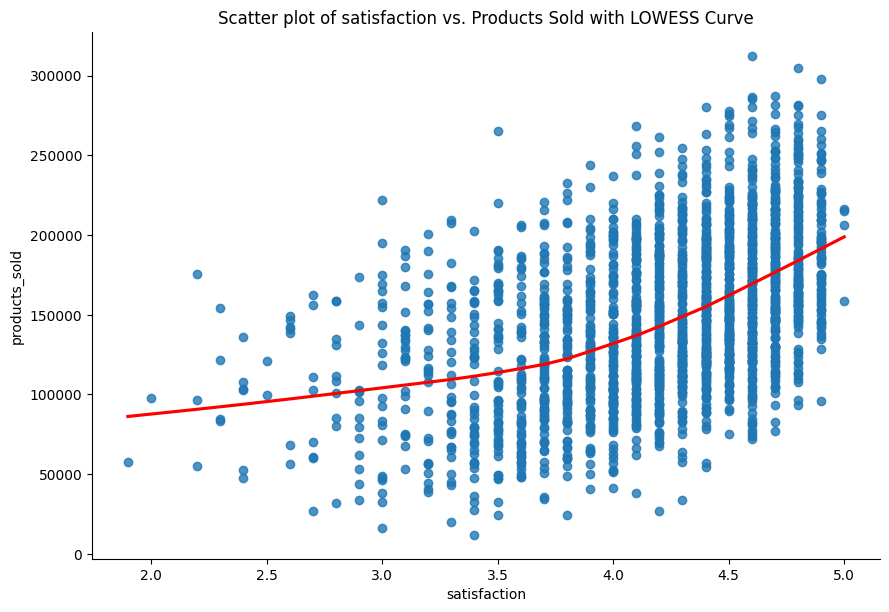

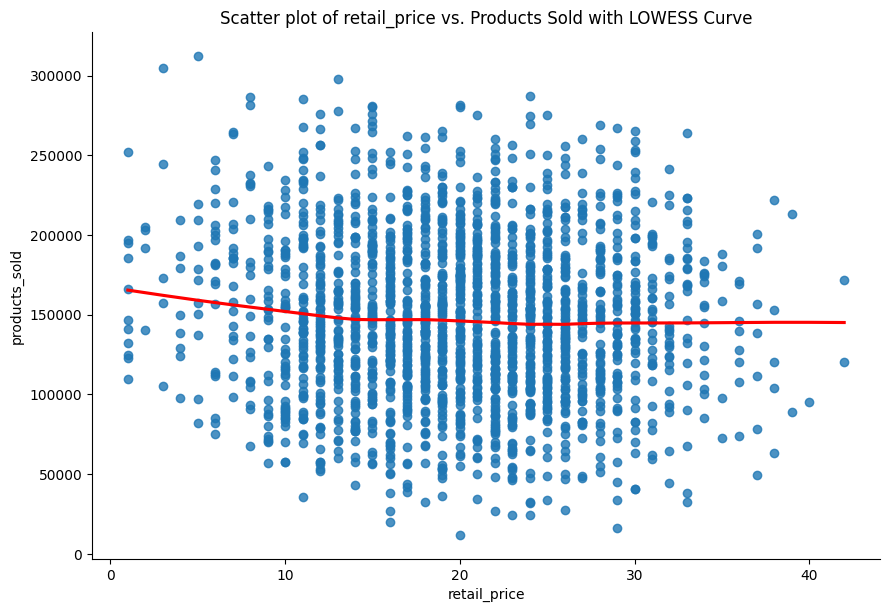

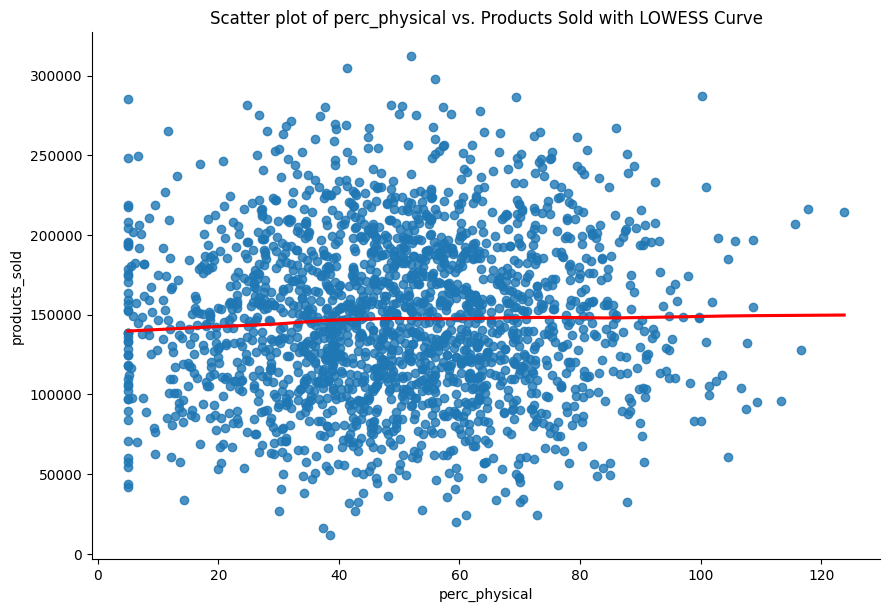

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

independent_vars = ['satisfaction', 'retail_price', 'perc_physical']

for var in independent_vars:
    sns.lmplot(x=var, y='products_sold', data=data_clean, height=6, aspect=1.5, lowess=True, line_kws={'color': 'red'})
    plt.title(f'Scatter plot of {var} vs. Products Sold with LOWESS Curve')
    plt.show()


2. Identification: 
The scatter plots were meticulously analyzed, with particular attention paid to how the LOWESS curves deviated from a straight line. Such deviations indicate non-linearity. Variables exhibiting these characteristics were noted for further action.

In [107]:

old_model = sm.OLS(y, X).fit()
r2_old = old_model.rsquared
print("Oude model R^2:", r2_old)


Oude model R^2: 0.7462840046446901


The 'old model' has an R-squared (R^2) value of 0.746, indicating that approximately 74.6% of the variability in the dependent variable products_sold is explained by the independent variables in the model. This value shows that the model explains a significant proportion of the variation in sales, indicating a good fit between the model and the observed data. It is important to stress that while a high R^2 value indicates that the model explains the data relatively well, it does not necessarily indicate causal relationships between the variables, nor does it guarantee that the model will accurately predict outside of the analysed data set.

3. Transformation:
For variables identified with non-linear relationships, appropriate transformations were applied to linearize their relationship with products_sold. The choice of transformation—be it logarithmic, square root, or polynomial—depended on the nature of the non-linearity observed. The goal was to modify the data in a way that these relationships could be adequately captured by a linear model.

Squared Root Transformation

In [108]:
import numpy as np

data['sqrt_discount'] = np.sqrt(data['discount'])


r_squared = model.rsquared
print(r_squared)


0.7462840046446901


After applying a square root transformation to certain variables to account for non-linear relationships, the model achieved an R^2 value of 0.746. This means that approximately 74.6% of the variation in products_sold is explained by the independent variables in the model. Such a value indicates a good fit of the model to the data, indicating that the transformation effectively helped to improve the linear relationship between the independent and dependent variables.

Polynomial Satisfaction

In [109]:
data['retail_price_squared'] = data['retail_price'] ** 2

r_squared = model.rsquared
print(r_squared)


0.7462840046446901


4. Model Re-fitting: 
After applying transformations, the regression model was re-fitted with the modified dataset. This step was crucial for evaluating the effectiveness of the transformations in improving the model's fit.

5. Assessment of Model Fit:
The fit of the re-fitted model was compared to the original model. Key metrics such as R-squared and p-values were analyzed to determine if the transformations led to a more accurate and reliable model.

In [120]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

combined = X.join(y)
cleaned_combined = combined.dropna()
X_clean = cleaned_combined[X.columns]
y_clean = cleaned_combined['products_sold']

print("NaN in X:", X_clean.isnull().sum().sum())
print("NaN in y:", y_clean.isnull().sum())


model = sm.OLS(y_clean, X_clean).fit()


print(model.summary())


NaN in X: 0
NaN in y: 0
                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1116.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:43:44   Log-Likelihood:                -23639.
No. Observations:                2038   AIC:                         4.729e+04
Df Residuals:                    2032   BIC:                         4.732e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const           

The square root transformation and polynomial satisfaction models were evaluated. Both models have similar R-squared values, indicating similar performance in explaining variability in the number of products sold. Ease of interpretation and theoretical relevance are similar between the models. Avoiding excessive complexity was a consideration in the choice of model. 

Part 2: Data modelling
After you have completed assignment 1, 2, and 3, you should now have a final dataset fit for
analysis, and it is now time to actually make the final model. If you were not able to do one
of the steps in the previous assignment, just work with the data that you have. You can still
get some points for the model even if the data is not entirely correct.


Assignment 4: (30%)
First, create a model where all independent variables are included and clearly explain what
the outcome of each variable in the model means for how many products are sold.
Second, the management wants you to settle a debate that is going on among the staff.
Some people say that the price matters the most for how much a product sells. After all,
products that are cheaper will sell more. A second group claims that the market size
matters the most. After all, the more potential buyers there are, the more products you can
sell. Use the correct regression techniques to figure out who is correct. Clearly explain how
you got to your conclusion.